In [1]:
from hmmlearn import hmm
import os
import pandas as pd
import trackpy as tp
import numpy as np

In [2]:
exp_path = '/Volumes/GoogleDrive/My Drive/postdoc/Raw_Data/20230119_runx2_tracking'
tracks_path = os.path.join(exp_path, 'processed_tracks')
tracks = [f for f in os.listdir(tracks_path) if '.csv' in f]

In [3]:
X = []
lens = []
for t in tracks:
    df = pd.read_csv(os.path.join(tracks_path, t))
    df = df[df.compartment == 'nuc']
    df = tp.filter_stubs(df, 3)
    grouped = df.groupby('particle')
    for n,track in grouped:
        arr = track.RperTimeSF.dropna().to_list()
        X.append(arr)
        lens.append(len(arr))


In [4]:
from pomegranate import *
model = HiddenMarkovModel.from_samples(NormalDistribution, n_components=3, X=X)

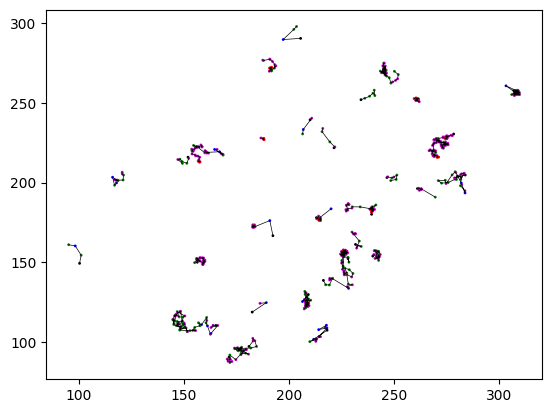

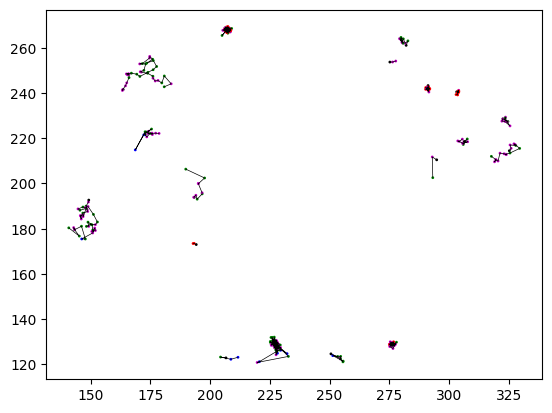

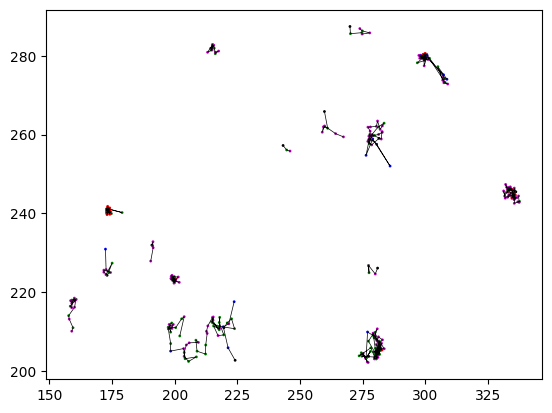

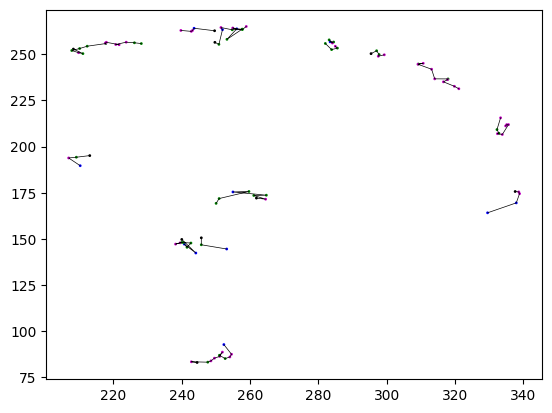

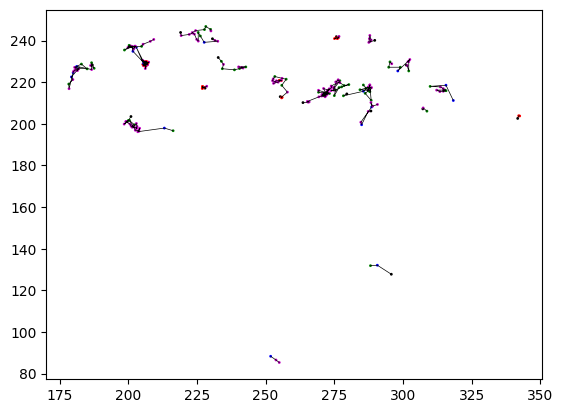

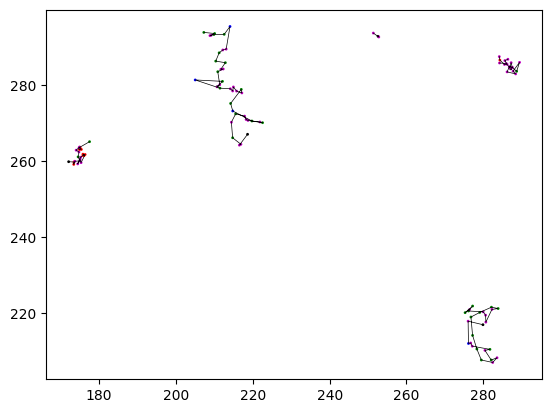

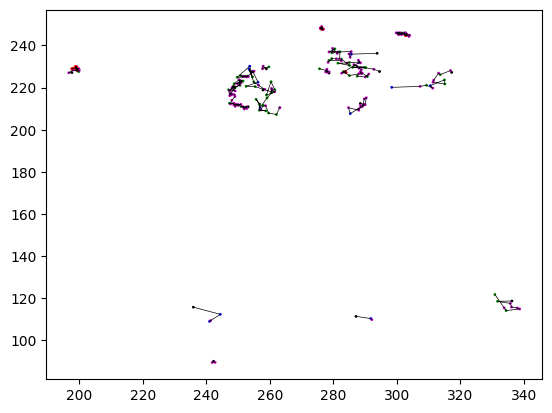

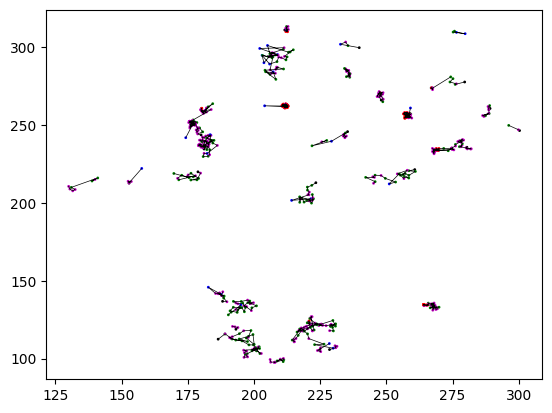

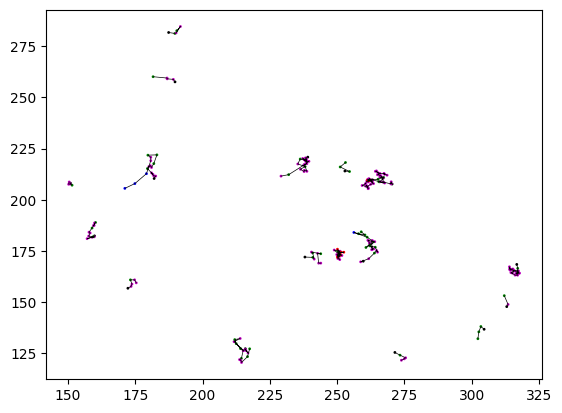

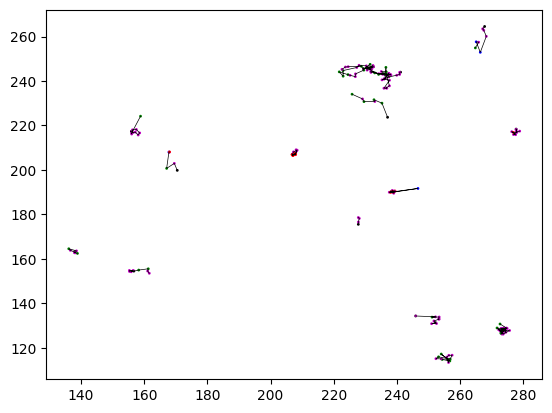

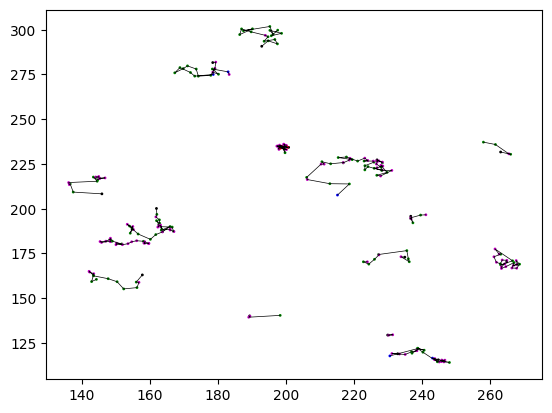

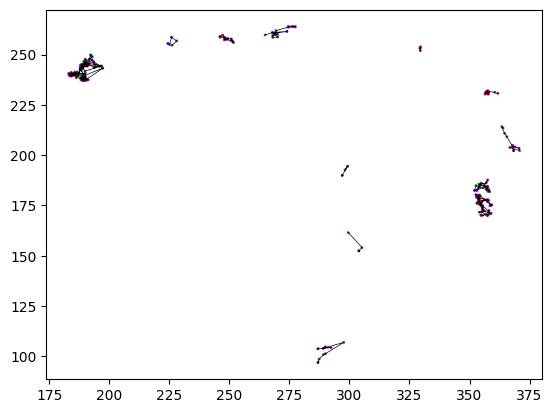

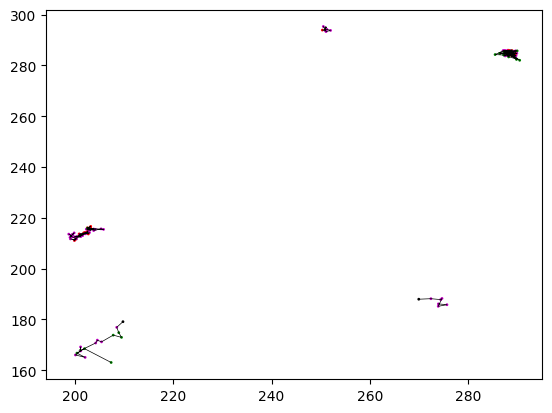

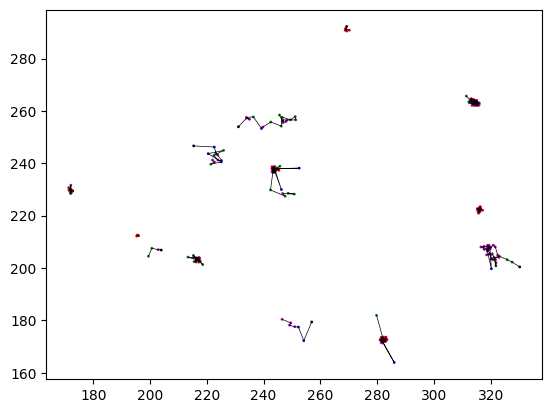

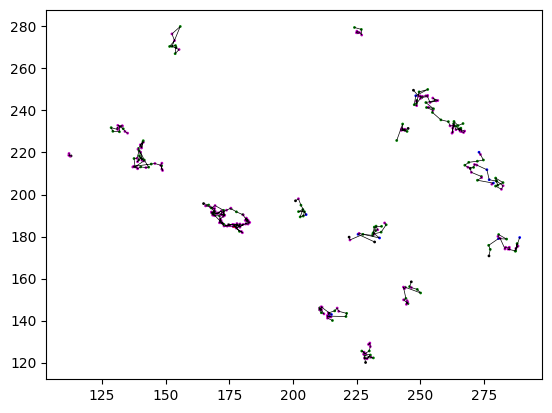

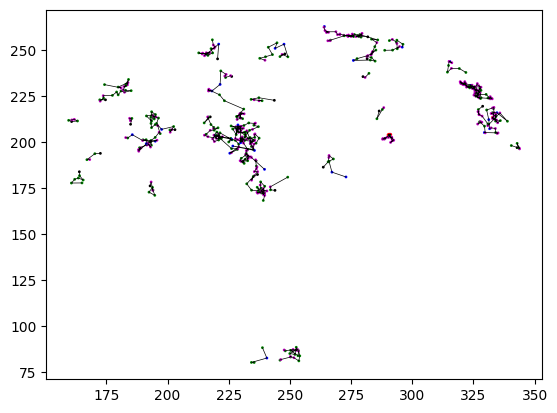

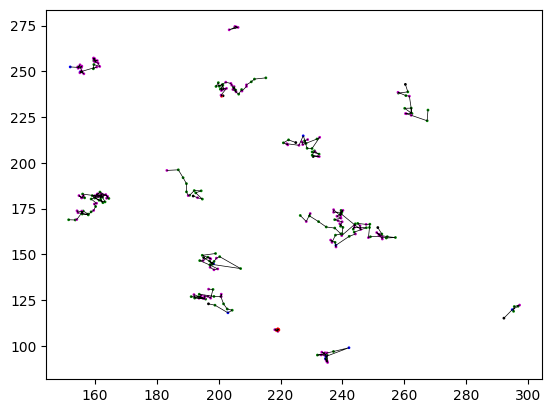

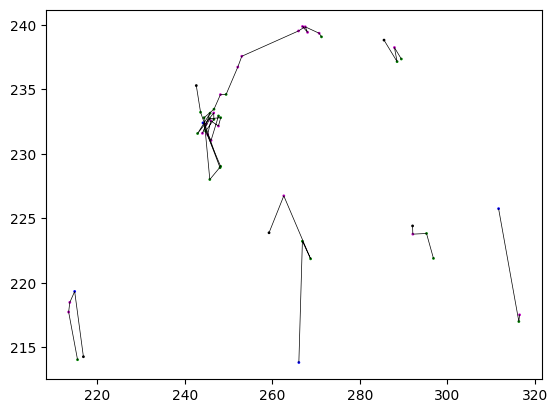

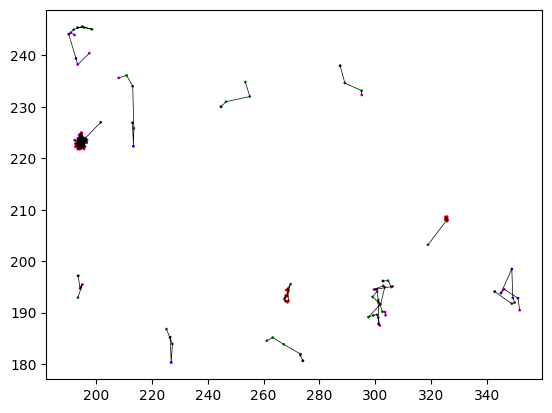

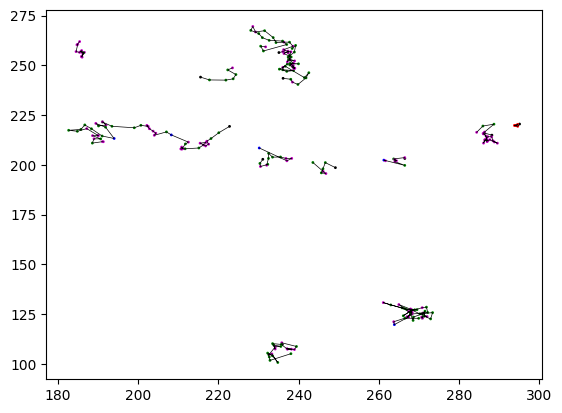

In [6]:
import matplotlib.pyplot as plt

for t in tracks:
    fig,ax=plt.subplots()

    df = pd.read_csv(os.path.join(tracks_path, t))
    df = df[df.compartment == 'nuc']
    df = tp.filter_stubs(df, 3)
    grouped = df.groupby('particle')
    for n,track in grouped:
        if n<100:
            states = model.predict(track.RperTimeSF.dropna().to_list())
            if len(states) == len(track):
                colors=[]
            else:
                colors=['k']
            for f in states:
                if f == 0:
                    colors.append('r')
                elif f == 1:
                    colors.append('b')
                elif f == 2:
                    colors.append('g')
                elif f == 3:
                    colors.append('m')
                else:
                    colors.append('k')
            ax.plot(track['x'], track['y'], color='k', lw=.5)
            ax.scatter(track['x'], track['y'], c=colors, s=1)
    plt.show()
    plt.close()

